In [1]:
from myutils import generate_dataset
x, y = generate_dataset()

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, verbose=True)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 131.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [4]:
expected, predicted = y_test, clf.predict(x_test)

from sklearn.metrics import classification_report
report = classification_report(expected, predicted)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.9675531914893617

In [6]:
clf.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [7]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
import pandas as pd
dataframe = pd.DataFrame(clf.cv_results_)
dataframe.to_csv('cross_validation_svm.csv')

#dataframe = pd.DataFrame(report)
#dataframe.to_csv('precision_recall_svm.csv')

In [9]:
import numpy as np

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf.best_estimator_, x, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

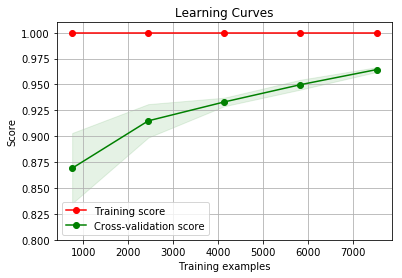

In [12]:
from myutils import plot_learning_curve
plot_learning_curve('Learning Curves', train_sizes, train_scores, test_scores, ylim=(0.8, 1.01))